<a href="https://colab.research.google.com/github/Datag4rcia/AAPL/blob/main/trab_de_minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimento de Tweet
O atual dataset pode ser encontrado no link: https://www.kaggle.com/code/leandrodoze/sentiment-analysis-in-portuguese/notebook

Com este dataset temos o objetivo de realizar a manipulação, tratamento, análises em geral, visualização de dados e a aplicação de algoritmos de classificação.Afim de trazer um insight satisfatório


## Instalação e carrregamento das bibliotecas

In [1]:
#instalação das bibliotecas

!pip install matplotlib.pyplot
!pip install plotly.express
!pip install seaborn
!pip install wordcloud
!pip install nltk
!pip install deep-translator

#carregamento das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
import re
import string
import warnings
from wordcloud import WordCloud
from deep_translator import GoogleTranslator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.3 MB/s eta 0:00:00


## Carregamento do dataset

In [6]:
df= pd.read_csv('Tweets_Mg.csv',encoding='utf-8')
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análise Exploratória

In [10]:
print(df.count())

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64


In [7]:
print(df.describe())

        Unnamed: 0  Geo Coordinates.latitude  Geo Coordinates.longitude  \
count  8199.000000                104.000000                 104.000000   
mean   4099.000000                -42.964716                 -19.530204   
std    2366.991762                  1.399314                   1.037815   
min       0.000000                -46.643035                 -23.493237   
25%    2049.500000                -43.941907                 -19.914265   
50%    4099.000000                -41.971876                 -18.879871   
75%    6148.500000                -41.943662                 -18.859150   
max    8198.000000                -41.560230                 -18.568089   

       Retweet Count  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
count    8199.000000          0.0          0.0          0.0          0.0   
mean       43.338212          NaN          NaN          NaN          NaN   
std       123.369519          NaN          NaN          NaN          NaN   
min         0.000000

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

## Limpeza

In [24]:
#removendo colunas nulas

df = df.drop(['Unnamed: 0','Unnamed: 10',	'Unnamed: 11',	'Unnamed: 12',
              'Unnamed: 13',	'Unnamed: 14','Retweet Count','Observação',
              'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
              'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
              'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'], axis=1, errors='ignore')


In [25]:
df.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,Negativo


In [32]:
#removendo emojis, símbolos, pontuações, menções e acentuações

import re
import unicodedata

def limpar_texto(texto):
    if not isinstance(texto, str):
        return texto

    # Remover emojis e símbolos
    texto = re.sub(r'[^\w\s]', '', texto)

    # Remover menções do tipo @usuario
    texto = re.sub(r'@\w+', '', texto)

    # Remover pontuação (mantém apenas letras, números e espaços)
    texto = re.sub(r'[^\w\s]', '', texto)

    # Remover acentuação
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')

    # Remover múltiplos espaços
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto


df['Text'] = df['Text'].apply(limpar_texto)

df = df.applymap(lambda x: limpar_texto(x) if isinstance(x, str) else x)


<ipython-input-32-1b8b4215ee55>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: limpar_texto(x) if isinstance(x, str) else x)


In [33]:
df.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Classificacao
0,Sun Jan 08 012205 0000 2017,Catedral de Santo Antonio Governador Valadares...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,Neutro
1,Sun Jan 08 014901 0000 2017,Governador Valadares Minas Gerais httpstcoB3Th...,-41.9333,-18.85,NaN,Wandell,klefnews,Neutro
2,Sun Jan 08 010146 0000 2017,Governador Valadares Minas Gerais httpstcodPkg...,-41.9333,-18.85,NaN,Wandell,klefnews,Neutro
3,Wed Jan 04 214351 0000 2017,httpstcoBnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,Neutro
4,Mon Jan 09 150821 0000 2017,PSOL vai questionar aumento de vereadores e pr...,NaN,NaN,NaN,Emily,Milly777,Negativo


## Manipulação de Dados


In [34]:
#Por ter muitas faltas na latitude e longitude, vamos apagar estas colunas
df= df.drop(['Geo Coordinates.latitude','Geo Coordinates.longitude'], axis=1)
df.head()

,Created At,Text,User Location,Username,User Screen Name,Classificacao
0,Sun Jan 08 012205 0000 2017,Catedral de Santo Antonio Governador Valadares...,Brasil,Leonardo C Schneider,LeoCSchneider,Neutro
1,Sun Jan 08 014901 0000 2017,Governador Valadares Minas Gerais httpstcoB3Th...,NaN,Wandell,klefnews,Neutro
2,Sun Jan 08 010146 0000 2017,Governador Valadares Minas Gerais httpstcodPkg...,NaN,Wandell,klefnews,Neutro
3,Wed Jan 04 214351 0000 2017,httpstcoBnDsO34qK0,NaN,Ana estudando,estudandoconcur,Neutro
4,Mon Jan 09 150821 0000 2017,PSOL vai questionar aumento de vereadores e pr...,NaN,Emily,Milly777,Negativo


In [37]:
#Para a localização vamos substituir os valores faltantes pela a moda

moda = df['User Location'].mode()[0]
df['User Location'] = df['User Location'].fillna(moda)
df.head()

,Created At,Text,User Location,Username,User Screen Name,Classificacao
0,Sun Jan 08 012205 0000 2017,Catedral de Santo Antonio Governador Valadares...,Brasil,Leonardo C Schneider,LeoCSchneider,Neutro
1,Sun Jan 08 014901 0000 2017,Governador Valadares Minas Gerais httpstcoB3Th...,Brasil,Wandell,klefnews,Neutro
2,Sun Jan 08 010146 0000 2017,Governador Valadares Minas Gerais httpstcodPkg...,Brasil,Wandell,klefnews,Neutro
3,Wed Jan 04 214351 0000 2017,httpstcoBnDsO34qK0,Brasil,Ana estudando,estudandoconcur,Neutro
4,Mon Jan 09 150821 0000 2017,PSOL vai questionar aumento de vereadores e pr...,Brasil,Emily,Milly777,Negativo


## Pré processamento

In [48]:
print(df['Text'].iloc[0])

Catedral de Santo Antonio Governador ValadaresMG httpstcoJSbKamIqUJ


In [53]:
#Tokenização e remoção de stopwords

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

def preprocessar_texto(texto):
    # Tokenizar
    tokens = word_tokenize(texto)

    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens_sem_stopwords = [word for word in tokens if word.lower() not in stop_words]

    return tokens_sem_stopwords

# Exemplo de uso
texto = "Catedral de Santo Antonio Governador ValadaresMG httpstcoJSbKamIqUJs"
tokens_processados = preprocessar_texto(texto)
print(tokens_processados)


['Catedral', 'Santo', 'Antonio', 'Governador', 'ValadaresMG', 'httpstcoJSbKamIqUJs']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Baixar stopwords se necessário
nltk.download('stopwords')
nltk.download('punkt')

# Função para limpar e tokenizar o texto
def preprocessar_texto(texto):
    tokens = word_tokenize(texto)
    stop_words = set(stopwords.words('portuguese'))
    tokens_sem_stopwords = [word for word in tokens if word.lower() not in stop_words]
    return tokens_sem_stopwords

# Exemplo de texto
texto = "Catedral de Santo Antonio Governador ValadaresMG httpstcoJSbKamIqUJs"

# Pre-processamento e tokenização
tokens_processados = preprocessar_texto(texto)

# Contagem de frequência das palavras
frequencia = Counter(tokens_processados)
print(frequencia)


Counter({'Catedral': 1, 'Santo': 1, 'Antonio': 1, 'Governador': 1, 'ValadaresMG': 1, 'httpstcoJSbKamIqUJs': 1})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Visualização de dados

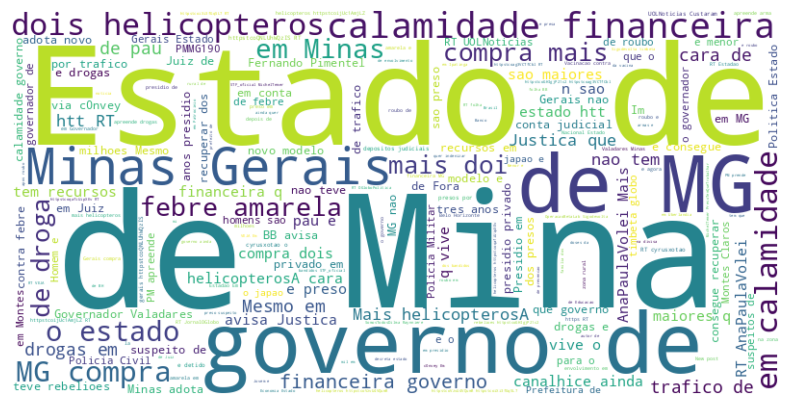

In [55]:
# Exemplo de DataFrame
import pandas as pd


# Unindo todos os textos processados em um único string
texto_unido = ' '.join(df['Text'])

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_unido)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Para remover os eixos
plt.show()


## Análise de Sentimentos

In [56]:
!pip install textblob

In [59]:
import pandas as pd
from textblob import TextBlob


# Função para analisar o sentimento
def analisar_sentimento(texto):
    blob = TextBlob(texto)
    sentimento = blob.sentiment
    if sentimento.polarity > 0:
        return 'Positivo'
    elif sentimento.polarity < 0:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicando a análise de sentimentos na coluna 'comentarios'
df['sentimento'] = df['Classificacao'].apply(analisar_sentimento)

df.head()


,Data de criação,Text,User Location,Username,User Screen Name,Classificacao,sentimento
0,NaT,Catedral de Santo Antonio Governador Valadares...,Brasil,Leonardo C Schneider,LeoCSchneider,Neutro,Neutro
1,NaT,Governador Valadares Minas Gerais httpstcoB3Th...,Brasil,Wandell,klefnews,Neutro,Neutro
2,NaT,Governador Valadares Minas Gerais httpstcodPkg...,Brasil,Wandell,klefnews,Neutro,Neutro
3,NaT,httpstcoBnDsO34qK0,Brasil,Ana estudando,estudandoconcur,Neutro,Neutro
4,NaT,PSOL vai questionar aumento de vereadores e pr...,Brasil,Emily,Milly777,Negativo,Neutro


# Análises e Conclusões
Depois do estudo podemos concluir que os tweets eram sobre a politica do estado de Minas Gerais, onde tem bastante reclamações sobre as partes financeiras, estruturais e doenças.
Podemos dizer também que muito se fala dos partidos politicos e dos politicos em si. E em grande parte são notícias e opiniões em relação as próprias notícias sobre o estado de Minas Gerais